# **ANALYTICS FOR UNSTRUCTURED DATA: GROUP ASSIGNMENT #1**

Group Members: Ohyoon Kwon, Samuel Oh, Ankita Kundra, Seun Ibitoye, Ambikha Maharaj

#### **1. Which forum you chose (provide URL)**

#### We chose the 5000 oldest posts from the Edmunds.com Entry Level Luxury discussion forum : https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans

   ### **Task 1 & 2: Web Scrapping:**

In [ ]:
#Selenium is an open-source tool that automates web browsers.
!pip install selenium
!apt-get -q update   #Used to handle installation and removal of softwares and libraries
!apt install -yq chromium-chromedriver #ChromeDriver is a separate executable that Selenium WebDriver uses to control Chrome.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver 
#WebDriver is a browser automation framework that works with open source APIs. 
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

     |████████████████████████████████| 904 kB 11.0 MB/s 
Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:11 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main Sources [1,802 kB]
Ign:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86

In [ ]:
wd = webdriver.Chrome('chromedriver',options=chrome_options)
wd.get('https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans')

In [ ]:
import pandas as pd
comments = pd.DataFrame(columns = ['Date', 'comments']) 

for p in range(1, 101, 1):
    page_url = "https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p" + str(p)
    wd.get(page_url)

    ids = wd.find_elements_by_xpath("//*[contains(@id,'Comment_')]")

    comment_ids = []
    for i in ids:
        comment_ids.append(i.get_attribute('id'))

    for x in comment_ids:
        user_date = wd.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[2]/span[1]/a/time')[0]
        date = user_date.get_attribute('title')

        user_message = wd.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[3]/div/div[1]')[0]
        comment = user_message.text

        comments.loc[len(comments)] = [date, comment]
  
print(comments.head())
print(comments.shape[0])

                     Date                                           comments
0  March 24, 2002 10:54PM  I personally think that with a few tweaks the ...
1  March 25, 2002 12:06AM  I am debating a new purchase and these two are...
2  March 25, 2002 10:02AM  Great handling, RWD, excellent engine and the ...
3   March 25, 2002 4:04PM  And no manual tranny. That may not matter to y...
4   March 25, 2002 5:44PM  One beauty of BMW 3 Series is that there are s...
5000


In [ ]:
comments.to_csv("results.csv")
!ls
from google.colab import files
files.download("results.csv")

results.csv  sample_data


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Task A: Does the data support Zipf's Law?**

In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
%pylab inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Populating the interactive namespace from numpy and matplotlib


In [ ]:
import io
comments_df = pd.read_csv('results.csv')
comments_df.drop(columns = 'Unnamed: 0', inplace = True)
comments_df.head()

,Date,comments
0,"March 24, 2002 10:54PM",I personally think that with a few tweaks the ...
1,"March 25, 2002 12:06AM",I am debating a new purchase and these two are...
2,"March 25, 2002 10:02AM","Great handling, RWD, excellent engine and the ..."
3,"March 25, 2002 4:04PM",And no manual tranny. That may not matter to y...
4,"March 25, 2002 5:44PM",One beauty of BMW 3 Series is that there are s...


In [ ]:
#Remove punctuation and convert to lower case
comments_df['comments'] = comments_df['comments'].astype(str)
comments_df['comments'] = comments_df['comments'].apply(lambda x :x.translate(str.maketrans('', '', string.punctuation)))
comments_df['comments'] = comments_df['comments'].apply(lambda x :x.lower())

In [ ]:
#stitch all the words together 
def stitch_words(comment_col):
    corpus = ""
    for words in comment_col:
        corpus += words
    return corpus
corpus = stitch_words(comments_df['comments']).lower()

#tokenize the words for counts 
tokens = nltk.word_tokenize(corpus)

#count the word frequencies 
from collections import Counter
word_frequencies =Counter(tokens)

#find the top 100 most common
common_100= word_frequencies.most_common(100)

In [ ]:
#create a df to check zipf's law
zipf_df=pd.DataFrame(common_100, columns =['words','freq'])

#insert rank column 
zipf_df['rank'] = zipf_df.index + 1

In [ ]:
#zipf's law
#this is predicting the frequency 
max_freq = common_100[0][1]
counter = 1
zipf = []
while len(zipf) < 100:
    zipf.append(max_freq/counter)
    counter += 1

Text(0, 0.5, 'Frequency')

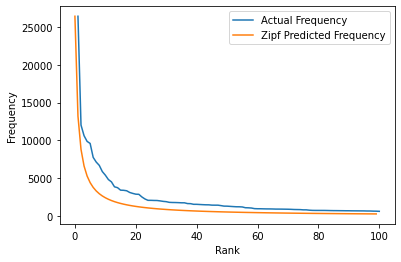

In [ ]:
#Rank vs frequency & zipf's law 
plot(zipf_df['rank'], zipf_df['freq'], label = 'Actual Frequency')
plot(zipf, label = 'Zipf Predicted Frequency') 
legend(loc='best')
xlabel('Rank')
ylabel('Frequency')

Text(0, 0.5, 'Frequency')

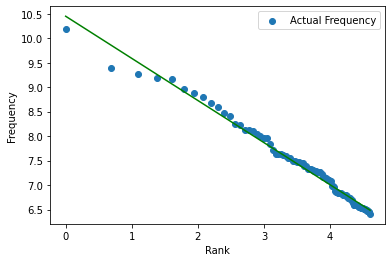

In [ ]:
#Log rank vs log frequency & regression fitted line
import numpy as np

scatter(np.log(zipf_df['rank']), np.log(zipf_df['freq']), label = 'Actual Frequency')
m,b = np.polyfit(np.log(zipf_df['rank']),np.log(zipf_df['freq']), 1) 
plot(np.log(zipf_df['rank']), m*np.log(zipf_df['rank'])+b, color='green')
#plt.xlim(0,10)
legend(loc='best')
xlabel('Rank')
ylabel('Frequency')

### **Task B: Find the top 10 brands from frequency counts?**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving car_models_and_brands.csv to car_models_and_brands.csv


In [ ]:
brand_df = pd.read_csv('car_models_and_brands.csv')
brand_df.columns = ['brand','model']
brand_df.head()

,brand,model
0,acura,integra
1,acura,legend
2,acura,vigor
3,acura,rlx
4,acura,ilx


In [ ]:
#Replace models by brands
def model_to_brand(s):
    for i in brand_df.index.values:
        s = s.replace(brand_df["model"][i].lower(),brand_df["brand"][i].lower())
    return s
comments_df['comments_model_replace'] = comments_df['comments'].apply(model_to_brand)

In [ ]:
stop_words = stopwords.words('english') 
comments_df['comments_model_replace_words'] = comments_df['comments_model_replace'].apply(word_tokenize).apply(set)

def remove_stopwords(s):
    return [x for x in s if not x in stop_words] 
    
comments_df['comments_model_replace_words'] =  comments_df['comments_model_replace_words'].apply(remove_stopwords)
comments_df

,Date,comments,comments_model_replace,comments_model_replace_words
0,"March 24, 2002 10:54PM",i personally think that with a few tweaks the ...,i personally think that with a few tweaks the ...,"[inch, driver, could, see, faults, without, ja..."
1,"March 25, 2002 12:06AM",i am debating a new purchase and these two are...,i am debating a new purchase and these two are...,"[appreciate, worth, prices, dont, lot, dilemma..."
2,"March 25, 2002 10:02AM",great handling rwd excellent engine and the be...,great handling rwd excellent engine and the be...,"[easy, rwd, warranty, excellent, great, best, ..."
3,"March 25, 2002 4:04PM",and no manual tranny that may not matter to yo...,and no manual tranny that may not matter to yo...,"[may, board, even, imo, certainly, manual, mat..."
4,"March 25, 2002 5:44PM",one beauty of bmw 3 series is that there are s...,one beauty of bmw 3 series is that there are s...,"[absolutely, basic, awd, models, convertible, ..."
...,...,...,...,...
4995,"January 23, 2006 9:51PM",i agree with blueguydotcom the is350 is one fa...,i agree with blueguydotcom the is350 is one fa...,"[fun, suspension, crawling, nice, deficiencies..."
4996,"January 23, 2006 11:29PM",dont have any interest in aftermarket tuners t...,dont have any interest in aftermarket tuners t...,"[trick, aftermarket, produce, tuners, dont, 35..."
4997,"January 24, 2006 7:39PM",dont have any interest in aftermarket tuners\n...,dont have any interest in aftermarket tuners\n...,"[naturally, pushing, works, aftermarket, v8, t..."
4998,"January 24, 2006 7:42PM",amg i have no use forits mb afterall as for m ...,amg i have no use forits mb afterall as for m ...,"[mb, division, forits, afterall, dinan, want, ..."


In [ ]:
#Creating a combined list of all words
all_words = []
for i in range(len(comments_df)):
    all_words+=comments_df['comments_model_replace_words'][i]
from nltk import FreqDist
word_freq = nltk.FreqDist(all_words)

In [ ]:
#Creating a list of all brand names
brand_names = brand_df['brand'].unique()
brand_names

array(['acura', 'audi', 'bmw', 'buick', 'cadillac', 'car', 'chevrolet',
       'chrysler', 'dodge', 'ford', 'honda', 'hyndai kia', 'hyundai',
       'hyundai,', 'hyundai.', 'infiniti', 'kia', 'kia,', 'kia.',
       'lincoln', 'mazda', 'mercedes', 'mercedes benz', 'mercedes-benz',
       'mercury', 'mitsubishi', 'nissan', 'nissan.', 'pontiac', 'problem',
       'saturn', 'seat', 'sedan', 'subaru', 'suzuki', 'toyata', 'toyota',
       'volkswagen', 'volkwagen', 'volvo'], dtype=object)

In [ ]:
#Filtering counts for brands
brand_counts = []
for key,item in word_freq.most_common():
    if key in brand_names:
        temp = (key,item)
        brand_counts.append(temp)

In [ ]:
brands_sorted_df = pd.DataFrame(brand_counts, columns = ['Brand','Freq'])
brands_sorted_df.drop([0, 2, 9, 10], axis = 0, inplace =True)


#### **2. Which 10 brands you chose – provide the frequency table**

In [ ]:
brands_sorted_df[:10]

,Brand,Freq
1,bmw,1348
3,acura,558
4,honda,427
5,audi,415
6,infiniti,384
7,toyota,315
8,nissan,301
11,subaru,208
12,mercedes-benz,178
13,volkswagen,171


### **Task C: Calculate lift ratios for associations between the top-10 brands identified in Task B**

In [ ]:
top_brands = list(brands_sorted_df['Brand'][:10])
top_brands

['bmw',
 'acura',
 'honda',
 'audi',
 'infiniti',
 'toyota',
 'nissan',
 'subaru',
 'mercedes-benz',
 'volkswagen']

In [ ]:
lifts_df = pd.DataFrame(columns = ['A', 'B', 'Lift'])
for i in range(10):
    for j in range(10):
        if j != i:
            top_brands[i]
            top_brands[j]
            na = 0
            nb = 0
            nab = 0
            for k in comments_df['comments_model_replace_words']:
                if top_brands[i] in k:
                    na += 1
                    if top_brands[j] in k:
                        nab += 1
                if top_brands[j] in k:
                    nb += 1
            lifts = ((nab * 5000) / (na * nb))
            lifts_df.loc[len(lifts_df)] = [top_brands[i], top_brands[j], lifts]
            
#lifts_df = lifts_df.append({'A': 'volvo', 'B': 'bmw', 'Lift': np.nan},ignore_index=True)
lift_matrix = lifts_df.pivot(index='A', columns='B', values='Lift')
lift_matrix

#a = pd.crosstab(lifts_df['A'], lifts_df['B'])
#a

B,acura,audi,bmw,honda,infiniti,mercedes-benz,nissan,subaru,toyota,volkswagen
A,,,,,,,,,,
acura,NaN,2.223950,1.528881,2.560164,3.056862,2.063952,2.262470,2.153984,1.792115,1.781634
audi,2.223950,NaN,1.716063,1.382579,2.761044,3.384324,1.561062,1.795644,1.223943,4.650180
bmw,1.528881,1.716063,NaN,1.276937,2.028468,1.958790,1.256938,1.212623,1.448354,1.561768
honda,2.560164,1.382579,1.276937,NaN,1.402713,1.710391,3.968038,1.519996,3.903201,2.122793
infiniti,3.056862,2.761044,2.028468,1.402713,NaN,2.779728,2.508998,1.815405,1.116071,2.208212
mercedes-benz,2.063952,3.384324,1.958790,1.710391,2.779728,NaN,1.679794,1.080380,2.051008,3.449635
nissan,2.262470,1.561062,1.256938,3.968038,2.508998,1.679794,NaN,1.517378,3.796868,2.817120
subaru,2.153984,1.795644,1.212623,1.519996,1.815405,1.080380,1.517378,NaN,1.373626,2.530364
toyota,1.792115,1.223943,1.448354,3.903201,1.116071,2.051008,3.796868,1.373626,NaN,2.134967


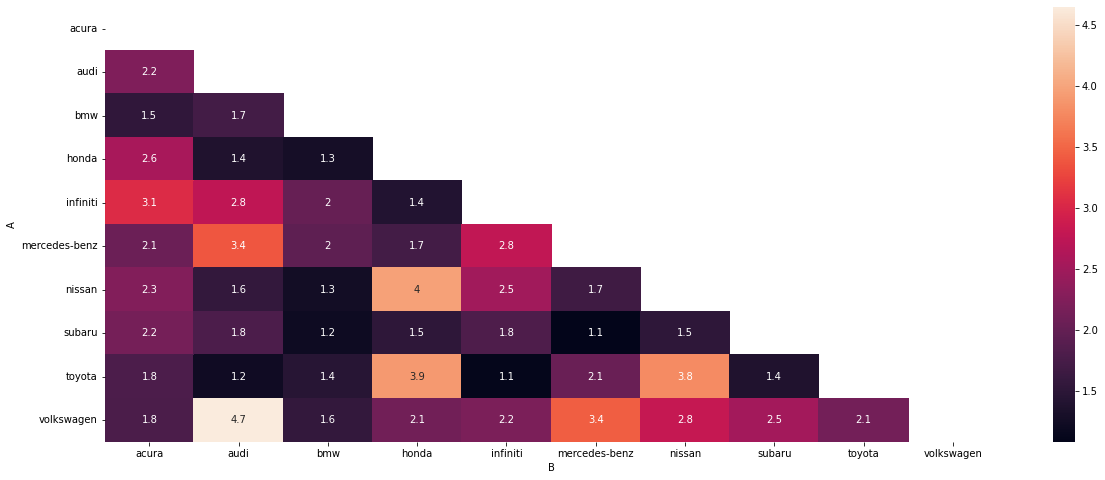

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,8))


sns.heatmap(lift_matrix.fillna(0),
            annot=True,mask=np.triu(lift_matrix))

### **Task D: Multi-Dimensional Scaling Map**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler

In [ ]:
ds_matrix = lifts_df.pivot(index='A', columns='B', values='Lift').apply(lambda x: 1/x).fillna(0)
ds_matrix

B,acura,audi,bmw,honda,infiniti,mercedes-benz,nissan,subaru,toyota,volkswagen
A,,,,,,,,,,
acura,0.000000,0.449650,0.654073,0.390600,0.327133,0.484507,0.441995,0.464256,0.558000,0.561282
audi,0.449650,0.000000,0.582729,0.723286,0.362182,0.295480,0.640590,0.556903,0.817031,0.215045
bmw,0.654073,0.582729,0.000000,0.783124,0.492983,0.510519,0.795584,0.824659,0.690439,0.640300
honda,0.390600,0.723286,0.783124,0.000000,0.712904,0.584662,0.252014,0.657896,0.256200,0.471077
infiniti,0.327133,0.362182,0.492983,0.712904,0.000000,0.359747,0.398566,0.550841,0.896000,0.452855
mercedes-benz,0.484507,0.295480,0.510519,0.584662,0.359747,0.000000,0.595311,0.925600,0.487565,0.289886
nissan,0.441995,0.640590,0.795584,0.252014,0.398566,0.595311,0.000000,0.659032,0.263375,0.354972
subaru,0.464256,0.556903,0.824659,0.657896,0.550841,0.925600,0.659032,0.000000,0.728000,0.395200
toyota,0.558000,0.817031,0.690439,0.256200,0.896000,0.487565,0.263375,0.728000,0.000000,0.468391


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"
No handles with labels found to put in legend.


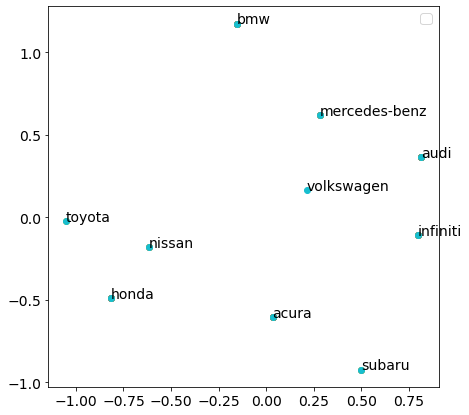

In [ ]:
X = ds_matrix
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
mds = MDS(2, random_state=0)
X2 = mds.fit_transform(X_scaled)

x = []
y = []
colors = ['blue', 'orange', 'green', 'red', 'purple', 'magenta', 'black', 'cyan', 'pink', 'yellow']
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
for i in range(10):
    x.append(X2[i][0])
    y.append(X2[i][1])
    plt.scatter(x,y)
    plt.annotate(X.index[i], xy=(X2[i][0], X2[i][1]))

plt.legend()
plt.show()

### **Task E: Insights that can you offered to the client from analyses in Tasks C and D**

**Task C:**

High Association: It can be seen from the Lift Matrix that there is high association between Toyota and Honda, Toyota and Nissan, Volkswagen and Audi, Mercedes and Volkswagen, Toyota and Honda, Honda and Nissan, Toyota and Nissan

Low Association: BMW and Toyota, Subaru and BMW, Honda and Audi, Honda and BMW 

**Task D:**

BMW: BMW has relatively less competition. It has low lifts with other brands in the top 10, but highest frequency. This could mean that BMW's competitor brand is not in the top 10. This could also mean people tend to make less comparisons with BMW and simply say more about its performance. 

Volkswagen: High lifts with other brands but lowest frequency. When people discuss about Volkswagen, it is usually when making comparisons with other brands. Low frequency, but high lift. It is not really considered as an entry level luxury car. It is considered more in comparison brand against other entry level luxury brands.

Possibility of 'switching behaviour' amongst brands in the cluster. Volvo, Volks, subaru, toyota, Nissan. 

### **Task F: Five most frequently mentioned attributes or features of cars in the discussions**

In [ ]:
words =[]
for i in range(len(comments_df['comments_model_replace_words'] )):
          words = words + comments_df['comments_model_replace_words'][i]
words_frq = nltk.FreqDist(words)
words_frq.most_common(70)

[('car', 2546),
 ('bmw', 1348),
 ('like', 1251),
 ('one', 1110),
 ('dont', 1068),
 ('would', 1026),
 ('get', 991),
 ('tl', 975),
 ('think', 942),
 ('pontiac5', 803),
 ('much', 740),
 ('im', 723),
 ('better', 722),
 ('drive', 718),
 ('even', 683),
 ('sedan', 675),
 ('new', 666),
 ('performance', 658),
 ('3', 656),
 ('good', 635),
 ('know', 633),
 ('people', 626),
 ('really', 622),
 ('well', 610),
 ('best', 592),
 ('also', 566),
 ('acura', 558),
 ('driving', 551),
 ('want', 544),
 ('still', 534),
 ('say', 512),
 ('time', 499),
 ('way', 499),
 ('see', 486),
 ('thats', 486),
 ('make', 478),
 ('go', 455),
 ('luxury', 445),
 ('engine', 430),
 ('honda', 427),
 ('price', 426),
 ('could', 424),
 ('buy', 423),
 ('audi', 415),
 ('series', 414),
 ('great', 409),
 ('going', 409),
 ('doesnt', 404),
 ('330i', 400),
 ('many', 397),
 ('years', 394),
 ('right', 387),
 ('take', 387),
 ('less', 386),
 ('ive', 384),
 ('infiniti', 384),
 ('handling', 382),
 ('cant', 380),
 ('back', 379),
 ('rwd', 376),
 ('p

**We manually picked top 5 features: performance, luxury, engine, price, power.**

In [ ]:
best_5features = np.array(['performance', 'luxury', 'engine', 'price', 'power'])
best_5features

array(['performance', 'luxury', 'engine', 'price', 'power'], dtype='<U11')

In [ ]:
features_lift = pd.DataFrame(columns = ['Brand', 'Feature', 'Lift'])
for i in range(10):
    for j in range(5):
        top_brands[i]
        best_5features[j]
        na2 = 0
        nb2 = 0
        nab2 = 0
        for k in comments_df['comments_model_replace_words']:
            if top_brands[i] in k:
                na2 += 1
                if best_5features[j] in k:
                    nab2 += 1
            if best_5features[j] in k:
                nb2 += 1
        lifts2 = ((nab2 * 5000) / (na2 * nb2))
        features_lift.loc[len(features_lift)] = [top_brands[i], best_5features[j], lifts2]
features_lift = features_lift.pivot(index='Brand', columns='Feature', values='Lift')
features_lift

Feature,engine,luxury,performance,power,price
Brand,,,,,
acura,1.604568,1.993476,1.497968,1.801724,1.640668
audi,1.821238,1.732774,1.446516,1.905746,2.177725
bmw,1.509558,1.325309,1.499463,1.591077,1.506318
honda,1.470508,1.736705,1.512639,1.789403,1.896626
infiniti,1.544331,1.726358,1.583080,1.501061,1.711659
mercedes-benz,1.698458,2.083070,1.067245,1.430852,1.252835
nissan,1.661130,1.642465,1.312747,2.093112,1.208803
subaru,1.229875,3.295160,1.753566,1.933388,1.410708
toyota,1.771872,2.389870,1.447387,1.063875,1.676727


### **Task G: Advice that can be given to the client from Task F?**


Volkswagen, Subaru and Toyota have high association with Luxury.

Unexpectedly, there is low association between BMW and luxury.


Volkswagen has high association with price, luxury and power. Hence, used in comparison to other brands.

Strong association with Luxury:
Low association with Luxury:

Strong association with Price: 
Low association with Price:

Strong association with Engine: 
Low association with Price:

Strong association with Power: 
Low association with Price:

Strong association with Performance: 
Low association with Price:

### **Task H: Most aspirational brand in the data in terms of people actually wanting to buy or own**

In [ ]:
#These are the words/phrases we have associated with aspiration.
aspiration_list = ['hope to', 'want to', 'prefer', 'dream car', 'dream of', 'aspire', 'looking for','love to' ,
                  'desire', 'love','want']

In [ ]:

brand_df['Brand'] = brand_df['brand'].apply(lambda x :x.translate(str.maketrans('', '', string.punctuation)))

In [ ]:
def model_to_brand(s):
    for i in brand_df.index.values:
        s = s.replace(brand_df["model"][i].lower(),brand_df["Brand"][i].lower())
    return s
comments_df['comments_model_replace_stop_words'] = comments_df['comments'].apply(model_to_brand)

In [ ]:
def asp_words(x):
    for i in aspiration_list:
        x = x.replace(i,'aspiration')
    return x
comments_df['aspirational_words'] = comments_df['comments_model_replace_stop_words'].apply(asp_words)

In [ ]:
comments_df

,Date,comments,comments_model_replace,comments_model_replace_words,aspirational_words,comments_model_replace_stop_words
0,"March 24, 2002 10:54PM",i personally think that with a few tweaks the ...,i personally think that with a few tweaks the ...,"[inch, driver, could, see, faults, without, ja...",i personally think that with a few tweaks the ...,i personally think that with a few tweaks the ...
1,"March 25, 2002 12:06AM",i am debating a new purchase and these two are...,i am debating a new purchase and these two are...,"[appreciate, worth, prices, dont, lot, dilemma...",i am debating a new purchase and these two are...,i am debating a new purchase and these two are...
2,"March 25, 2002 10:02AM",great handling rwd excellent engine and the be...,great handling rwd excellent engine and the be...,"[easy, rwd, warranty, excellent, great, best, ...",great handling rwd excellent engine and the be...,great handling rwd excellent engine and the be...
3,"March 25, 2002 4:04PM",and no manual tranny that may not matter to yo...,and no manual tranny that may not matter to yo...,"[may, board, even, imo, certainly, manual, mat...",and no manual tranny that may not matter to yo...,and no manual tranny that may not matter to yo...
4,"March 25, 2002 5:44PM",one beauty of bmw 3 series is that there are s...,one beauty of bmw 3 series is that there are s...,"[absolutely, basic, awd, models, convertible, ...",one beauty of bmw 3 series is that there are s...,one beauty of bmw 3 series is that there are s...
...,...,...,...,...,...,...
4995,"January 23, 2006 9:51PM",i agree with blueguydotcom the is350 is one fa...,i agree with blueguydotcom the is350 is one fa...,"[fun, suspension, crawling, nice, deficiencies...",i agree with blueguydotcom the is350 is one fa...,i agree with blueguydotcom the is350 is one fa...
4996,"January 23, 2006 11:29PM",dont have any interest in aftermarket tuners t...,dont have any interest in aftermarket tuners t...,"[trick, aftermarket, produce, tuners, dont, 35...",dont have any interest in aftermarket tuners t...,dont have any interest in aftermarket tuners t...
4997,"January 24, 2006 7:39PM",dont have any interest in aftermarket tuners\n...,dont have any interest in aftermarket tuners\n...,"[naturally, pushing, works, aftermarket, v8, t...",dont have any interest in aftermarket tuners\n...,dont have any interest in aftermarket tuners\n...
4998,"January 24, 2006 7:42PM",amg i have no use forits mb afterall as for m ...,amg i have no use forits mb afterall as for m ...,"[mb, division, forits, afterall, dinan, want, ...",amg i have no use forits mb afterall as for m ...,amg i have no use forits mb afterall as for m ...


In [ ]:
lift_df = pd.DataFrame(columns = ['brand', 'brandcount', 'asp_count', 'lift', 'percent_aspirational'])
lift_df['brand'] = brand_df['Brand'].unique()

In [ ]:
overall_asp_count = 0
for comment in comments_df['aspirational_words']:
    if 'aspiration' in comment:
        overall_asp_count += 1
n = len(comments_df)
n

5000

In [ ]:
index = 0
for brand in lift_df['brand']:
    brandcount = 0
    asp_count = 0
    for comment in comments_df['aspirational_words']:
        if brand in comment:
            brandcount += 1
        if 'aspiration' in comment and brand in comment:
            asp_count += 1
        
    lift_df['brandcount'][index] = brandcount
    lift_df['asp_count'][index] = asp_count
    index += 1
  

In [ ]:
lift_df.drop([5,18,26,27,24,30,33], axis = 0, inplace =True)

In [ ]:
lift_df['percent_aspirational'] = lift_df['asp_count']/lift_df['brandcount']
lift_df['lift'] = (n*lift_df['asp_count'])/(lift_df['brandcount']*overall_asp_count)
lift_df.sort_values(by = 'lift', ascending = False)[:10]

,brand,brandcount,asp_count,lift,percent_aspirational
10,honda,2,1,2.29148,0.5
19,mercedesbenz,23,11,2.19185,0.478261
3,buick,37,16,1.98182,0.432432
29,suzuki,24,10,1.90956,0.416667
15,lincoln,109,44,1.85,0.40367
6,chevrolet,81,32,1.81055,0.395062
32,volkswagen,218,86,1.80795,0.394495
14,kia,64,25,1.79022,0.390625
8,dodge,255,98,1.76129,0.384314
7,chrysler,200,73,1.67278,0.365


**Most aspirational brand among the top 10**

In [ ]:
lift_df = pd.DataFrame(columns = ['brand', 'brandcount', 'asp_count', 'lift', 'percent_aspirational'])
lift_df['brand'] = top_brands
lift_df['brand'].replace('mercedes-benz', 'mercedes', inplace = True)

overall_asp_count = 0
for comment in comments_df['aspirational_words']:
    if 'aspiration' in comment:
        overall_asp_count += 1
n = len(comments_df)

index = 0
for brand in lift_df['brand']:
    brandcount = 0
    asp_count = 0
    for comment in comments_df['aspirational_words']:
        if brand in comment:
            brandcount += 1
        if 'aspiration' in comment and brand in comment:
            asp_count += 1
        
    lift_df['brandcount'][index] = brandcount
    lift_df['asp_count'][index] = asp_count
    index += 1
lift_df
lift_df['percent_aspirational'] = lift_df['asp_count']/lift_df['brandcount']
lift_df['lift'] = (n*lift_df['asp_count'])/(lift_df['brandcount']*overall_asp_count)
lift_df.sort_values(by = 'lift', ascending = False)[:10]

,brand,brandcount,asp_count,lift,percent_aspirational
9,volkswagen,218,86,1.80795,0.394495
4,infiniti,424,150,1.62133,0.353774
2,honda,611,200,1.50015,0.327332
6,nissan,382,125,1.49966,0.327225
0,bmw,1405,454,1.4809,0.323132
3,audi,505,162,1.47017,0.320792
1,acura,624,197,1.44686,0.315705
5,toyota,1416,430,1.39172,0.303672
7,subaru,283,80,1.29553,0.282686
8,mercedes,184,50,1.24537,0.271739


Thus, Volkswagen is the most aspirational brand according to our analysis followed by infiniti and honda.


